In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 49.9 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=7ce64f2830f0157b833cc867754aac366d2bda12005898e6bd32430e4c1da6b1
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=0092965b0ccae0e2d05c2d5b644223c1c01b035a23e8dd90856a85a2193d75a0
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=3a168dc5cc4293dd09bc46b22264d6de46e563ea56658e

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.0 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [46]:
book = "Oprah Winfrey_ A Biography, Second Edition   ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Oprah_Winfrey"
titlename = "Oprah_Winfrey"

In [47]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [48]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [49]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

7
1/chapter_1
1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7


In [50]:
mp_bert

{'1/chapter_1': [('oprah winfreybillions', 0.6724),
  ('oprah winfrey', 0.6147),
  ('oprah winfreytoward', 0.6079),
  ('oprah winfreyof', 0.606),
  ('oprah winfreyin', 0.6051)],
 '1/chapter_2': [('black politics', 0.5322),
  ('mississippian', 0.4989),
  ('mississippi', 0.4647),
  ('mississippi primary', 0.462),
  ('mississippi grandmother', 0.4361)],
 '1/chapter_3': [('oprah winfreythe items audiences', 0.5776),
  ('oprah shows', 0.5679),
  ('daytime television', 0.5638),
  ('oprah watchers', 0.561),
  ('network daytime television', 0.5352)],
 '1/chapter_4': [('oprah book club choice', 0.6866),
  ('oprah book pick', 0.6225),
  ('books oprah', 0.6108),
  ('book oprah', 0.6105),
  ('oprah book choices', 0.6077)],
 '1/chapter_5': [('oprah winfrey leadership academy', 0.5613),
  ('oprah scholarship', 0.5533),
  ('point oprah', 0.5157),
  ('opportunity oprah', 0.5115),
  ('oprah painful peace corps lesson', 0.5031)],
 '1/chapter_6': [('diets oprah', 0.6625),
  ('oprah winfreyproducts', 0.63

In [51]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [52]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
14
14
15
15
15


In [53]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'will oprah', 'oprah scholarship', 'addition', 'subject matter', 'South Africa', 'oprah winfrey leadership academy', 'oprah book club choice', 'oprah book pick', 'learning centers', 'Oprah Winfrey Leadership', 'Oprah Winfrey Network', 'preferred to return', 'refuse to return', 'Oprah Winfrey Show', 'oprah watchers', 'oprah views', 'closest friend', 'talk shows', 'refuse to bow', 'oprah winfreytoward', 'television commentators', 'oprah winfreybillions', 'themed programming', 'rst', 'daytime talk', 'mississippi', 'black politics', 'OPRAH WINFREYwhich Oprah', 'bloggers', 'bow to silence', 'host Oprah Winfrey', 'publishing industry', 'decision', 'oprah winfrey network', 'oprah book choices', 'show', 'Oprah Winfrey', 'OPRAH', 'determination and staying', 'spiritual advisor', 'mississippian', 'mississippi grandmother', 'popular culture', 'point oprah', 'oprah winfreyproducts', 'white children', 'association', 'weather and pines', 'oprah painful peace corps lesson', 'books oprah', 'insurance

In [54]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Oprah_Winfrey_2008': ['1/chapter_1', '1/chapter_2'], 'Oprah_Winfrey_2009': ['1/chapter_3'], 'Oprah_Winfrey_2007': ['1/chapter_5'], 'Oprah_Winfrey_2010': ['1/chapter_6'], 'Oprah_Winfrey_2002': ['1/chapter_7'], 'Television_Audience_2008': ['1/chapter_1'], 'Oprah_Winfreyof_2008': ['1/chapter_1'], 'Oprah_Winfrey_Show_2002': ['1/chapter_7'], 'Oprah_2008': ['1/chapter_2'], 'Oprah_2010': ['1/chapter_6'], 'Inﬂ_2008': ['1/chapter_1'], 'Obama_2008': ['1/chapter_1'], 'Oprah_Winfreytoward_2008': ['1/chapter_1'], 'Oprah_Winfreyin_2008': ['1/chapter_1'], 'Black_Billionaire_2008': ['1/chapter_1'], 'Oprah_Winfreybillions_2008': ['1/chapter_1'], 'Presidential_Candidate_2008': ['1/chapter_1'], 'Closest_Friend_2008': ['1/chapter_1'], 'Oprah_Winfreywhich_Oprah_2008': ['1/chapter_1'], 'Television_Programs_2008': ['1/chapter_2'], 'Television_Programs_2010': ['1/chapter_6'], 'Weather_And_Pines_2008': ['1/chapter_2'], 'Mississippi_2008': ['1/chapter_2'], 'Civil_Rights_2008': ['1/

In [55]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [56]:
key_yr_chap_mp

defaultdict(list,
            {'Oprah_Winfrey_2008': ['1/chapter_1', '1/chapter_2'],
             'Oprah_Winfrey_2009': ['1/chapter_3'],
             'Oprah_Winfrey_2007': ['1/chapter_5'],
             'Oprah_Winfrey_2010': ['1/chapter_6'],
             'Oprah_Winfrey_2002': ['1/chapter_7'],
             'Television_Audience_2008': ['1/chapter_1'],
             'Oprah_Winfreyof_2008': ['1/chapter_1'],
             'Oprah_Winfrey_Show_2002': ['1/chapter_7'],
             'Oprah_2008': ['1/chapter_2'],
             'Oprah_2010': ['1/chapter_6'],
             'Inﬂ_2008': ['1/chapter_1'],
             'Obama_2008': ['1/chapter_1'],
             'Oprah_Winfreytoward_2008': ['1/chapter_1'],
             'Oprah_Winfreyin_2008': ['1/chapter_1'],
             'Black_Billionaire_2008': ['1/chapter_1'],
             'Oprah_Winfreybillions_2008': ['1/chapter_1'],
             'Presidential_Candidate_2008': ['1/chapter_1'],
             'Closest_Friend_2008': ['1/chapter_1'],
             'Oprah_Wi

In [57]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Oprah_Winfrey_2008
Oprah_Winfrey_2009
Oprah_Winfrey_2007
Oprah_Winfrey_2010
Oprah_Winfrey_2002
Television_Audience_2008
Oprah_Winfreyof_2008
Oprah_Winfrey_Show_2002
Oprah_2008
Oprah_2010
Inﬂ_2008
Obama_2008
Oprah_Winfreytoward_2008
Oprah_Winfreyin_2008
Black_Billionaire_2008
Oprah_Winfreybillions_2008
Presidential_Candidate_2008
Closest_Friend_2008
Oprah_Winfreywhich_Oprah_2008
Television_Programs_2008
Television_Programs_2010
Weather_And_Pines_2008
Mississippi_2008
Civil_Rights_2008
Civil_Rights_2002
Searched_For_Supporters_2008
Black_Politics_2008
Mississippian_2008
Mississippi_Primary_2008
Natural_As_Breathing_2008
Addition_2008
Mississippi_Grandmother_2008
White_Children_2008
Rst_2008
Rst_2002
Daytime_Television_2009
Network_Daytime_Television_2009
Daytime_Talk_2009
Talk_Shows_2009
Oprah_Watchers_2009
Show_2009
Oprah_Shows_2009
Popular_Culture_2009
Oprah_Winfreythe_Items_Audiences_2009
Bipolar_Disorder_2009
Subject_Matter_2009
Book_Club_2002
Bow_To_Silence_2002
Books_Oprah_2002
Boo

In [58]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [59]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Television', 'Celebrity_interviews', 'Other_media', 'Film', 'Publishing_and_writing', 'Online', 'Radio', 'Personal_life', 'Homes', 'Romantic_history', 'Close_friends', 'Personal_wealth', 'Religious_views', 'Influence', 'Rankings', '"Oprahfication"', "Daytime_talk_show's_impact_on_LGBT_people", '"The_Oprah_Effect"', 'Politics', 'Spiritual_leadership', 'Fan_base', 'Philanthropy', "Oprah's_Angel_Network", 'South_Africa', 'Filmography', 'As_actress', 'As_herself', 'As_producer_only', 'Bibliography', 'Awards_and_honors', 'See_also', 'References', 'Notes', 'External_links']


In [60]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [61]:
mp_sim_score

{'Early_life->Oprah_Winfrey_2008': tensor(0.3031, device='cuda:0'),
 'Early_life->Oprah_Winfrey_2009': tensor(0.2574, device='cuda:0'),
 'Early_life->Oprah_Winfrey_2007': tensor(0.3572, device='cuda:0'),
 'Early_life->Oprah_Winfrey_2010': tensor(0.2484, device='cuda:0'),
 'Early_life->Oprah_Winfrey_2002': tensor(0.3280, device='cuda:0'),
 'Early_life->Television_Audience_2008': tensor(0.0043, device='cuda:0'),
 'Early_life->Oprah_Winfreyof_2008': tensor(0.2827, device='cuda:0'),
 'Early_life->Oprah_Winfrey_Show_2002': tensor(0.3039, device='cuda:0'),
 'Early_life->Oprah_2008': tensor(0.3263, device='cuda:0'),
 'Early_life->Oprah_2010': tensor(0.2222, device='cuda:0'),
 'Early_life->Inﬂ_2008': tensor(-0.0494, device='cuda:0'),
 'Early_life->Obama_2008': tensor(0.2213, device='cuda:0'),
 'Early_life->Oprah_Winfreytoward_2008': tensor(0.2827, device='cuda:0'),
 'Early_life->Oprah_Winfreyin_2008': tensor(0.2827, device='cuda:0'),
 'Early_life->Black_Billionaire_2008': tensor(0.2995, device

In [62]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [63]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [64]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [65]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

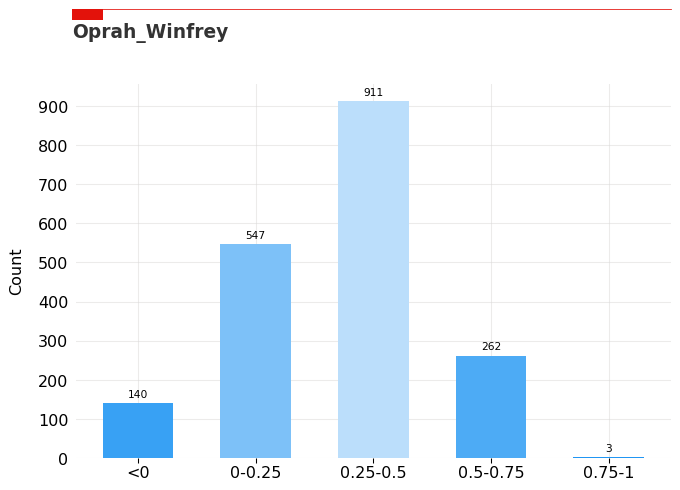

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [67]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life': 1986, 'Television': 2007, 'Celebrity_interviews': 2007, 'Other_media': -1, 'Film': 2006, 'Publishing_and_writing': 2008, 'Online': -1, 'Radio': 2006, 'Personal_life': -1, 'Homes': 2004, 'Romantic_history': 1983, 'Close_friends': 2002, 'Personal_wealth': 2006, 'Religious_views': -1, 'Influence': -1, 'Rankings': 2007, '"Oprahfication"': 1988, "Daytime_talk_show's_impact_on_LGBT_people": 1997, '"The_Oprah_Effect"': 2001, 'Politics': 2017, 'Spiritual_leadership': 2003, 'Fan_base': 2005, 'Philanthropy': 2010, "Oprah's_Angel_Network": 2004, 'South_Africa': 2005, 'Filmography': -1, 'As_actress': -1, 'As_herself': -1, 'As_producer_only': -1, 'Bibliography': -1, 'Awards_and_honors': -1, 'See_also': -1, 'References': -1, 'Notes': -1}


In [68]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [69]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


61


In [70]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_life   ->  18
Television   ->  40
Celebrity_interviews   ->  43
Film   ->  41
Publishing_and_writing   ->  57
Online   ->  48
Radio   ->  43
Homes   ->  46
Romantic_history   ->  20
Close_friends   ->  39
Personal_wealth   ->  50
Religious_views   ->  45
Rankings   ->  47
"Oprahfication"   ->  53
Daytime_talk_show's_impact_on_LGBT_people   ->  42
"The_Oprah_Effect"   ->  55
Politics   ->  44
Spiritual_leadership   ->  56
Fan_base   ->  50
Philanthropy   ->  44
Oprah's_Angel_Network   ->  46
South_Africa   ->  52
Bibliography   ->  52


In [71]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [72]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Television  ->   ['Talk_Shows_2009']
Celebrity_interviews  ->   ['Television_Programs_2008']
Publishing_and_writing  ->   ['Oprah_Winfreywhich_Oprah_2008', 'Oprah_Winfrey_2008', 'Oprah_2008', 'Oprah_Winfreybillions_2008', 'Oprah_Winfreyof_2008']
Close_friends  ->   ['Oprah_Book_Pick_2002', 'Oprah_Winfrey_Network_2002', 'Happy_Oprah_2002', 'Oprah_Winfrey_Show_2002', 'Will_Oprah_2002']
Rankings  ->   ['Oprah_Winfrey_2007', 'Oprah_Painful_Peace_Corps_Lesson_2007', 'Point_Oprah_2007']
"The_Oprah_Effect"  ->   ['Book_Club_2002', 'Publishing_Industry_2002']
Politics  ->   ['Closest_Friend_2008']
Spiritual_leadership  ->   ['Spiritual_Advisor_2010', 'Bipolar_Disorder_2009']
Philanthropy  ->   ['Oprah_2010', 'Oprah_Winfrey_2010', 'Oprah_Stresses_2010', 'Oprah_Exposed_2010', 'Oprah_Views_2010']
South_Africa  ->   ['Oprah_Winfrey_Leadership_Academy_2007', 'Oprah_Scholarship_2007', 'Opportunity_Oprah_2007', 'Leadership_Academy_2007', 'Build_School_2007']
{'Television': 1, 'Celebrity_interviews': 

In [73]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [74]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [75]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [76]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Oprah Winfrey', 'Television Programs', 'Oprah']
3
{'Television': 0, 'Celebrity_interviews': 0, 'Publishing_and_writing': 1, 'Close_friends': 0, 'Rankings': 1, '"The_Oprah_Effect"': 1, 'Politics': 0, 'Spiritual_leadership': 0, 'Philanthropy': 0, 'South_Africa': 2}


In [77]:
print(sum(list(mp2.values())))

5


In [78]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Television': set(), 'Celebrity_interviews': set(), 'Publishing_and_writing': set(), 'Close_friends': set(), 'Rankings': set(), '"The_Oprah_Effect"': set(), 'Politics': set(), 'Spiritual_leadership': set(), 'Philanthropy': set(), 'South_Africa': set()}
{'Television': 0, 'Celebrity_interviews': 0, 'Publishing_and_writing': 0, 'Close_friends': 0, 'Rankings': 0, '"The_Oprah_Effect"': 0, 'Politics': 0, 'Spiritual_leadership': 0, 'Philanthropy': 0, 'South_Africa': 0}
0


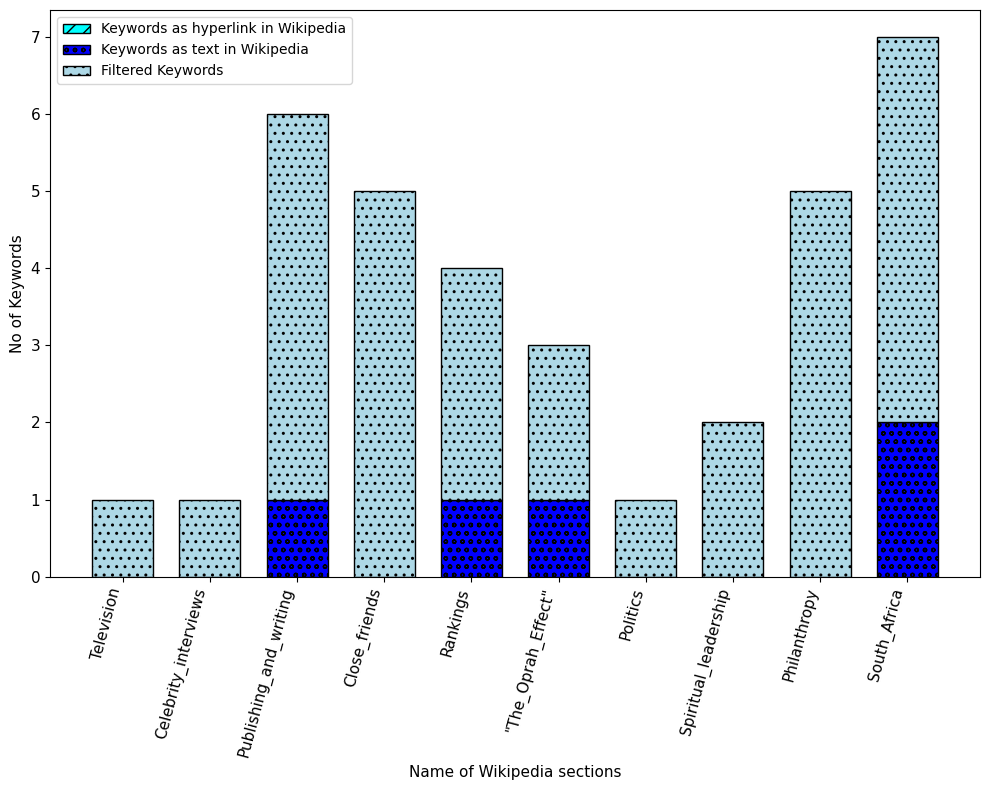

In [79]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [80]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Oprah_Scholarship', 'Oprah_Winfrey_Leadership_Academy', 'Closest_Friend', 'Spiritual_Advisor', 'Oprah_Winfrey_Network', 'Oprah_Views', 'Oprah_Winfrey', 'Oprah_Winfreyof', 'Oprah_Winfreybillions', 'Opportunity_Oprah', 'Oprah', 'Publishing_Industry', 'Talk_Shows', 'Oprah_Book_Pick', 'Television_Programs', 'Oprah_Stresses', 'Leadership_Academy', 'Oprah_Winfrey_Show', 'Oprah_Exposed', 'Build_School', 'Will_Oprah', 'Happy_Oprah', 'Oprah_Painful_Peace_Corps_Lesson', 'Book_Club', 'Bipolar_Disorder', 'Point_Oprah', 'Oprah_Winfreywhich_Oprah'}


In [81]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

2464
{'Dr._Oz', 'Robert_L._Carter', 'Lift_Every_Voice_and_Sing', 'Henry_Cisneros', 'Mae_Jemison', 'Coleman_Young', 'Tom_Hanks', 'Mathilde_Krim', 'Paul_Nitze', 'EBay', 'African_Americans_in_France', 'Sting_(musician)', 'Genetic_test', 'Richard_Berry_Harrison', 'Geoffrey_Canada', 'Percy_Lavon_Julian', 'List_of_U.S._communities_with_African-American_majority_populations_in_2000', 'Carla_Hills', 'Paul_Mellon', 'Rosie_O%27Donnell', 'Template:NAACP_Image_Award_for_Entertainer_of_the_Year', 'Roger_Mudd', 'Betty_Corday', 'Oxygen_(TV_channel)', 'International_Emmy_Founders_Award', 'Mary_Harriman_Rumsey', 'Orpah', 'Lily_Tomlin', 'Nancy_Pelosi', 'List_of_most_watched_television_interviews', 'Simon_Cowell', 'Helen_Keller', 'Index_of_articles_related_to_African_Americans', 'Rebecca_Talbot_Perkins', 'Category:African-American_society', 'Oprah%27s_Big_Give', 'Steve_Jobs', 'Joan_Rivers', 'African-American_Jews', 'Sit-in_movement', 'Gayle_King', 'Static_Media#Owned_or_associated_websites', 'James_J._Ki

In [82]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Oprah_Winfrey_Network'}


1

In [83]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Oprah_Stresses_2010', 'Oprah_Exposed_2010', 'Publishing_Industry_2002', 'Build_School_2007', 'Happy_Oprah_2002', 'Oprah_Winfrey_2007', 'Oprah_Winfrey_Show_2002', 'Oprah_Winfreyof_2008', 'Oprah_Winfreywhich_Oprah_2008', 'Oprah_Winfrey_Network_2002', 'Leadership_Academy_2007', 'Opportunity_Oprah_2007', 'Oprah_Winfrey_2008', 'Television_Programs_2008', 'Oprah_Winfreybillions_2008', 'Oprah_Painful_Peace_Corps_Lesson_2007', 'Book_Club_2002', 'Oprah_Winfrey_2010', 'Point_Oprah_2007', 'Oprah_2008', 'Oprah_Winfrey_Leadership_Academy_2007', 'Oprah_Scholarship_2007', 'Closest_Friend_2008', 'Talk_Shows_2009', 'Will_Oprah_2002', 'Bipolar_Disorder_2009', 'Spiritual_Advisor_2010', 'Oprah_Views_2010', 'Oprah_2010', 'Oprah_Book_Pick_2002'}


In [84]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Oprah_Winfrey_2008': ['1/chapter_1', '1/chapter_2'], 'Oprah_Winfrey_2007': ['1/chapter_5'], 'Oprah_Winfrey_2010': ['1/chapter_6'], 'Oprah_Winfreyof_2008': ['1/chapter_1'], 'Oprah_Winfrey_Show_2002': ['1/chapter_7'], 'Oprah_2008': ['1/chapter_2'], 'Oprah_2010': ['1/chapter_6'], 'Oprah_Winfreybillions_2008': ['1/chapter_1'], 'Closest_Friend_2008': ['1/chapter_1'], 'Oprah_Winfreywhich_Oprah_2008': ['1/chapter_1'], 'Television_Programs_2008': ['1/chapter_2'], 'Talk_Shows_2009': ['1/chapter_3'], 'Bipolar_Disorder_2009': ['1/chapter_3'], 'Book_Club_2002': ['1/chapter_4'], 'Oprah_Book_Pick_2002': ['1/chapter_4'], 'Publishing_Industry_2002': ['1/chapter_4'], 'Point_Oprah_2007': ['1/chapter_5'], 'Leadership_Academy_2007': ['1/chapter_5'], 'Oprah_Painful_Peace_Corps_Lesson_2007': ['1/chapter_5'], 'Oprah_Winfrey_Leadership_Academy_2007': ['1/chapter_5'], 'Oprah_Scholarship_2007': ['1/chapter_5'], 'Opportunity_Oprah_2007': ['1/chapter_5'], 'Build_School_2007': ['1/chapter_5'], 'Oprah_Stresses_20

In [85]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['oprah stresses', 'oprah exposed', 'publishing industry', 'build school', 'happy oprah', 'oprah winfrey', 'oprah winfrey show', 'oprah winfreyof', 'oprah winfreywhich oprah', 'oprah winfrey network', 'leadership academy', 'opportunity oprah', 'oprah winfrey', 'television programs', 'oprah winfreybillions', 'oprah painful peace corps lesson', 'book club', 'oprah winfrey', 'point oprah', 'oprah', 'oprah winfrey leadership academy', 'oprah scholarship', 'closest friend', 'talk shows', 'will oprah', 'bipolar disorder', 'spiritual advisor', 'oprah views', 'oprah', 'oprah book pick']


In [86]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

8
30
0.26666666666666666
